In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [29]:
X = pd.read_excel('Downloads/Copy of NIST Data Entry_IncludingTest08.xlsx' , skiprows=[1,2]) 
               # header=None)
# Shorten Column Headers
names= {
    "Who is recording this data? (Who are you?)" : "Recorder",
    "Tool flank wear on chamfer - 1st (in inches)" : "Tool Wear 1st",
    "Tool flank wear on chamfer - 2nd (in inches)" : "Tool Wear 2nd",
    "Tool flank wear on chamfer - 3rd (in inches)" : "Tool Wear 3rd",
    "Tool flank wear on chamfer - 4th (in inches)" : "Tool Wear 4th",
    "Surface finish - face (in microinches)" : "Surface Finish",
    "What time is it?" : "Recorded Time", 
    "What are you doing?\n(Please be descriptive.)": "Action",
    "What is the workpiece number?" : "Workpiece Number",
    "What is the layer number?" : "Layer Number",
    "What is the tool number?" : "Tool Number",
    "If the test was paused, when?\n(Skip this question if the machine was not stopped during the test.)" : "Pause Time",
    "On a scale from 1-5, what was the process condition?": "Process Condition",
    "On a scale from 1-5, what is the tool's condition?\n(Skip if in-process observation)" : "Tool Condition",
    "Describe the cut.\n(Be descriptive; if applicable, include sounds, quality, and such that were out of the ordinary)" : "Cut Description",
    "How long do you expect this tool to last before it reaches the end of life (in number of layers)?\n(You may skip this question for in-process observations.)" : "Expected Lifetime"
}
X.rename(columns=names, inplace=True)

In [30]:
X.head()

,Timestamp,Recorder,Tool Wear 1st,Tool Wear 2nd,Tool Wear 3rd,Tool Wear 4th,Surface Finish,Recorded Time,Action,Workpiece Number,Layer Number,Tool Number,What is the test status?,Pause Time,Process Condition,Tool Condition,Cut Description,Expected Lifetime,General notes
0,2022-08-15 13:53:15.667,Machinist,0.0014,0.0020,0.0016,0.0023,29.0,12:57:00,preparing to start 2nd layer,1.0,2.0,2.0,New layer,NaN,1 - Working as normal,1 - New or very light wear,sounds perfectly normal,7.0,NaN
1,2022-08-15 13:54:46.375,Non-Machinist,NaN,NaN,NaN,NaN,NaN,12:58:00,I am listening to the machine and tool as it i...,1.0,2.0,2.0,New layer,NaN,1 - Working as normal,1 - New or very light wear,The cut itself seemed very normal. There were ...,13.0,NaN
2,2022-08-16 09:28:06.158,Non-Machinist,NaN,NaN,NaN,NaN,NaN,09:24:00,Listening to the start of layer 3 of tool 2,1.0,3.0,2.0,New layer,NaN,1 - Working as normal,NaN,"This sounds very smooth, no abnormalities.",NaN,NaN
3,2022-08-16 09:28:21.147,Machinist,0.0033,0.0027,0.0021,0.0028,29.0,09:14:00,"preparing for layer 3, starting das",1.0,3.0,2.0,New layer,NaN,1 - Working as normal,1 - New or very light wear,sound very smooth,7.0,NaN
4,2022-08-16 09:54:23.848,Machinist,NaN,NaN,NaN,NaN,NaN,09:53:00,observing,1.0,3.0,2.0,Intermediary,NaN,1 - Working as normal,NaN,smooth and normal,7.0,NaN


In [31]:
X.dtypes

Timestamp                   datetime64[ns]
Recorder                            object
Tool Wear 1st                      float64
Tool Wear 2nd                      float64
Tool Wear 3rd                      float64
Tool Wear 4th                      float64
Surface Finish                     float64
Recorded Time                       object
Action                              object
Workpiece Number                   float64
Layer Number                       float64
Tool Number                        float64
What is the test status?            object
Pause Time                          object
Process Condition                   object
Tool Condition                      object
Cut Description                     object
Expected Lifetime                  float64
General notes                       object
dtype: object

(-0.5, 399.5, 199.5, -0.5)

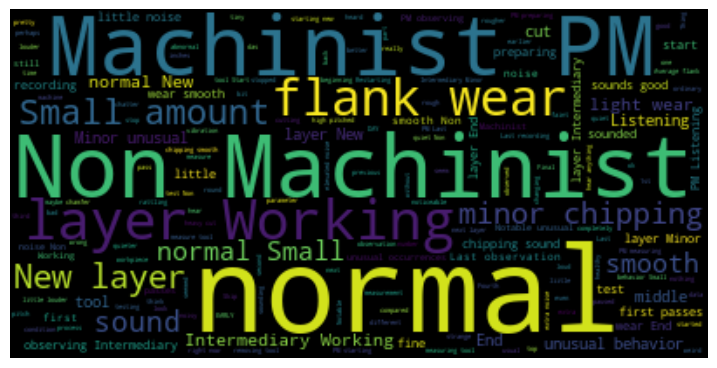

In [32]:
from wordcloud import WordCloud
data = open('Downloads/Copy of NIST Data Entry_IncludingTest08.csv').read()

wordcloud = WordCloud().generate(data)
# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))


# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')

# and remove the axis
plt.axis("off")

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
corpus=X.iloc[:,16].dropna()

#corpus
#  TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv_tfidf = TfidfVectorizer()
X_tfidf = cv_tfidf.fit_transform(corpus).toarray()
pd.DataFrame(X_tfidf, columns=cv_tfidf.get_feature_names())

C:\Users\snh28\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abnormal,abnormalities,abnornal,added,after,again,aggressive,alarming,all,already,...,well,went,were,what,which,whole,why,with,without,wrong
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.235526,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
2,0.0,0.639043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
299,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.497902,0.0
300,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.230041,0.000000,0.0
301,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.381379,0.0,0.000000,0.000000,0.0


In [35]:
X_tfidf.shape

(303, 265)

In [36]:
list(corpus)

['sounds perfectly normal',
 'The cut itself seemed very normal. There were no strange noises and nothing that seemed obviously different.',
 'This sounds very smooth, no abnormalities.',
 'sound very smooth ',
 'smooth and normal',
 'The cut still seems very smooth without any extra noises.',
 'It still sounded very smooth',
 'smooth and normal',
 'sounds normal, smooth',
 'It sounds very smooth',
 'sounds normal',
 'It sounds smooth as normal.',
 'On the last few passes, I heard a faint high-pitched buzzing sound anytime a cut was being made',
 'sounds great ',
 'normal',
 'The cut sounds smooth again.',
 'sounds normal.',
 'It seems smooth',
 'sounds a little bit louder than previous',
 'It sounded smooth other than a few small bursts of more intense buzzing sound',
 'sounds normal',
 'This cut sounds normal like the first few passes',
 'sounds normal',
 'The cut sounds a little different, perhaps rough enough to produce an extra noise sporadically',
 "I didn't hear anything out of 

In [37]:
#model = PCA(n_components=2)
#X_reduced = model.fit_transform(X_tfidf)
#model.fit_transform(X_tfidf)

In [38]:
#plt.scatter(X_reduced[:,0],X_reduced[:,1])

In [39]:
#model.components_.shape

In [40]:
# autre methode
model = PCA(n_components=265)
X_reduced = model.fit_transform(X_tfidf)

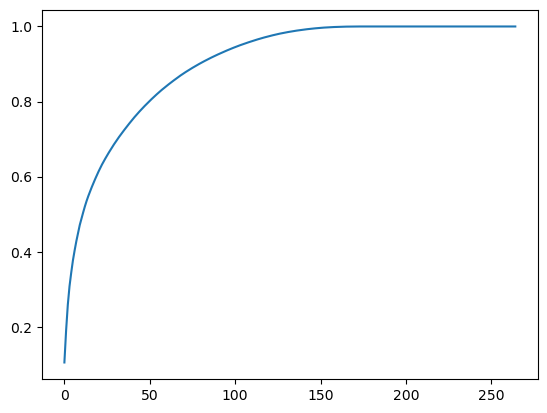

In [41]:
#the percentage of variance preserved for each of our components
plt.plot(np.cumsum(model.explained_variance_ratio_))

In [42]:
np.argmax(np.cumsum(model.explained_variance_ratio_)>0.99)

138

In [43]:
model = PCA(n_components=138)
X_reduced = model.fit_transform(X_tfidf)

In [44]:
X_recovered = model.inverse_transform(X_reduced)

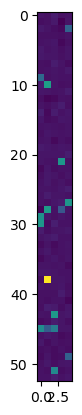

In [45]:
plt.imshow(X_recovered[1].reshape(53,5))

In [48]:
X['Tool Condition'].unique()

array(['1 - New or very light wear', nan,
       '2 - Small amount of flank wear and/or minor chipping',
       '5 - Failed (broken or end-of-life) or imminent failure',
       '3 - Average flank wear and/or notable chipping'], dtype=object)

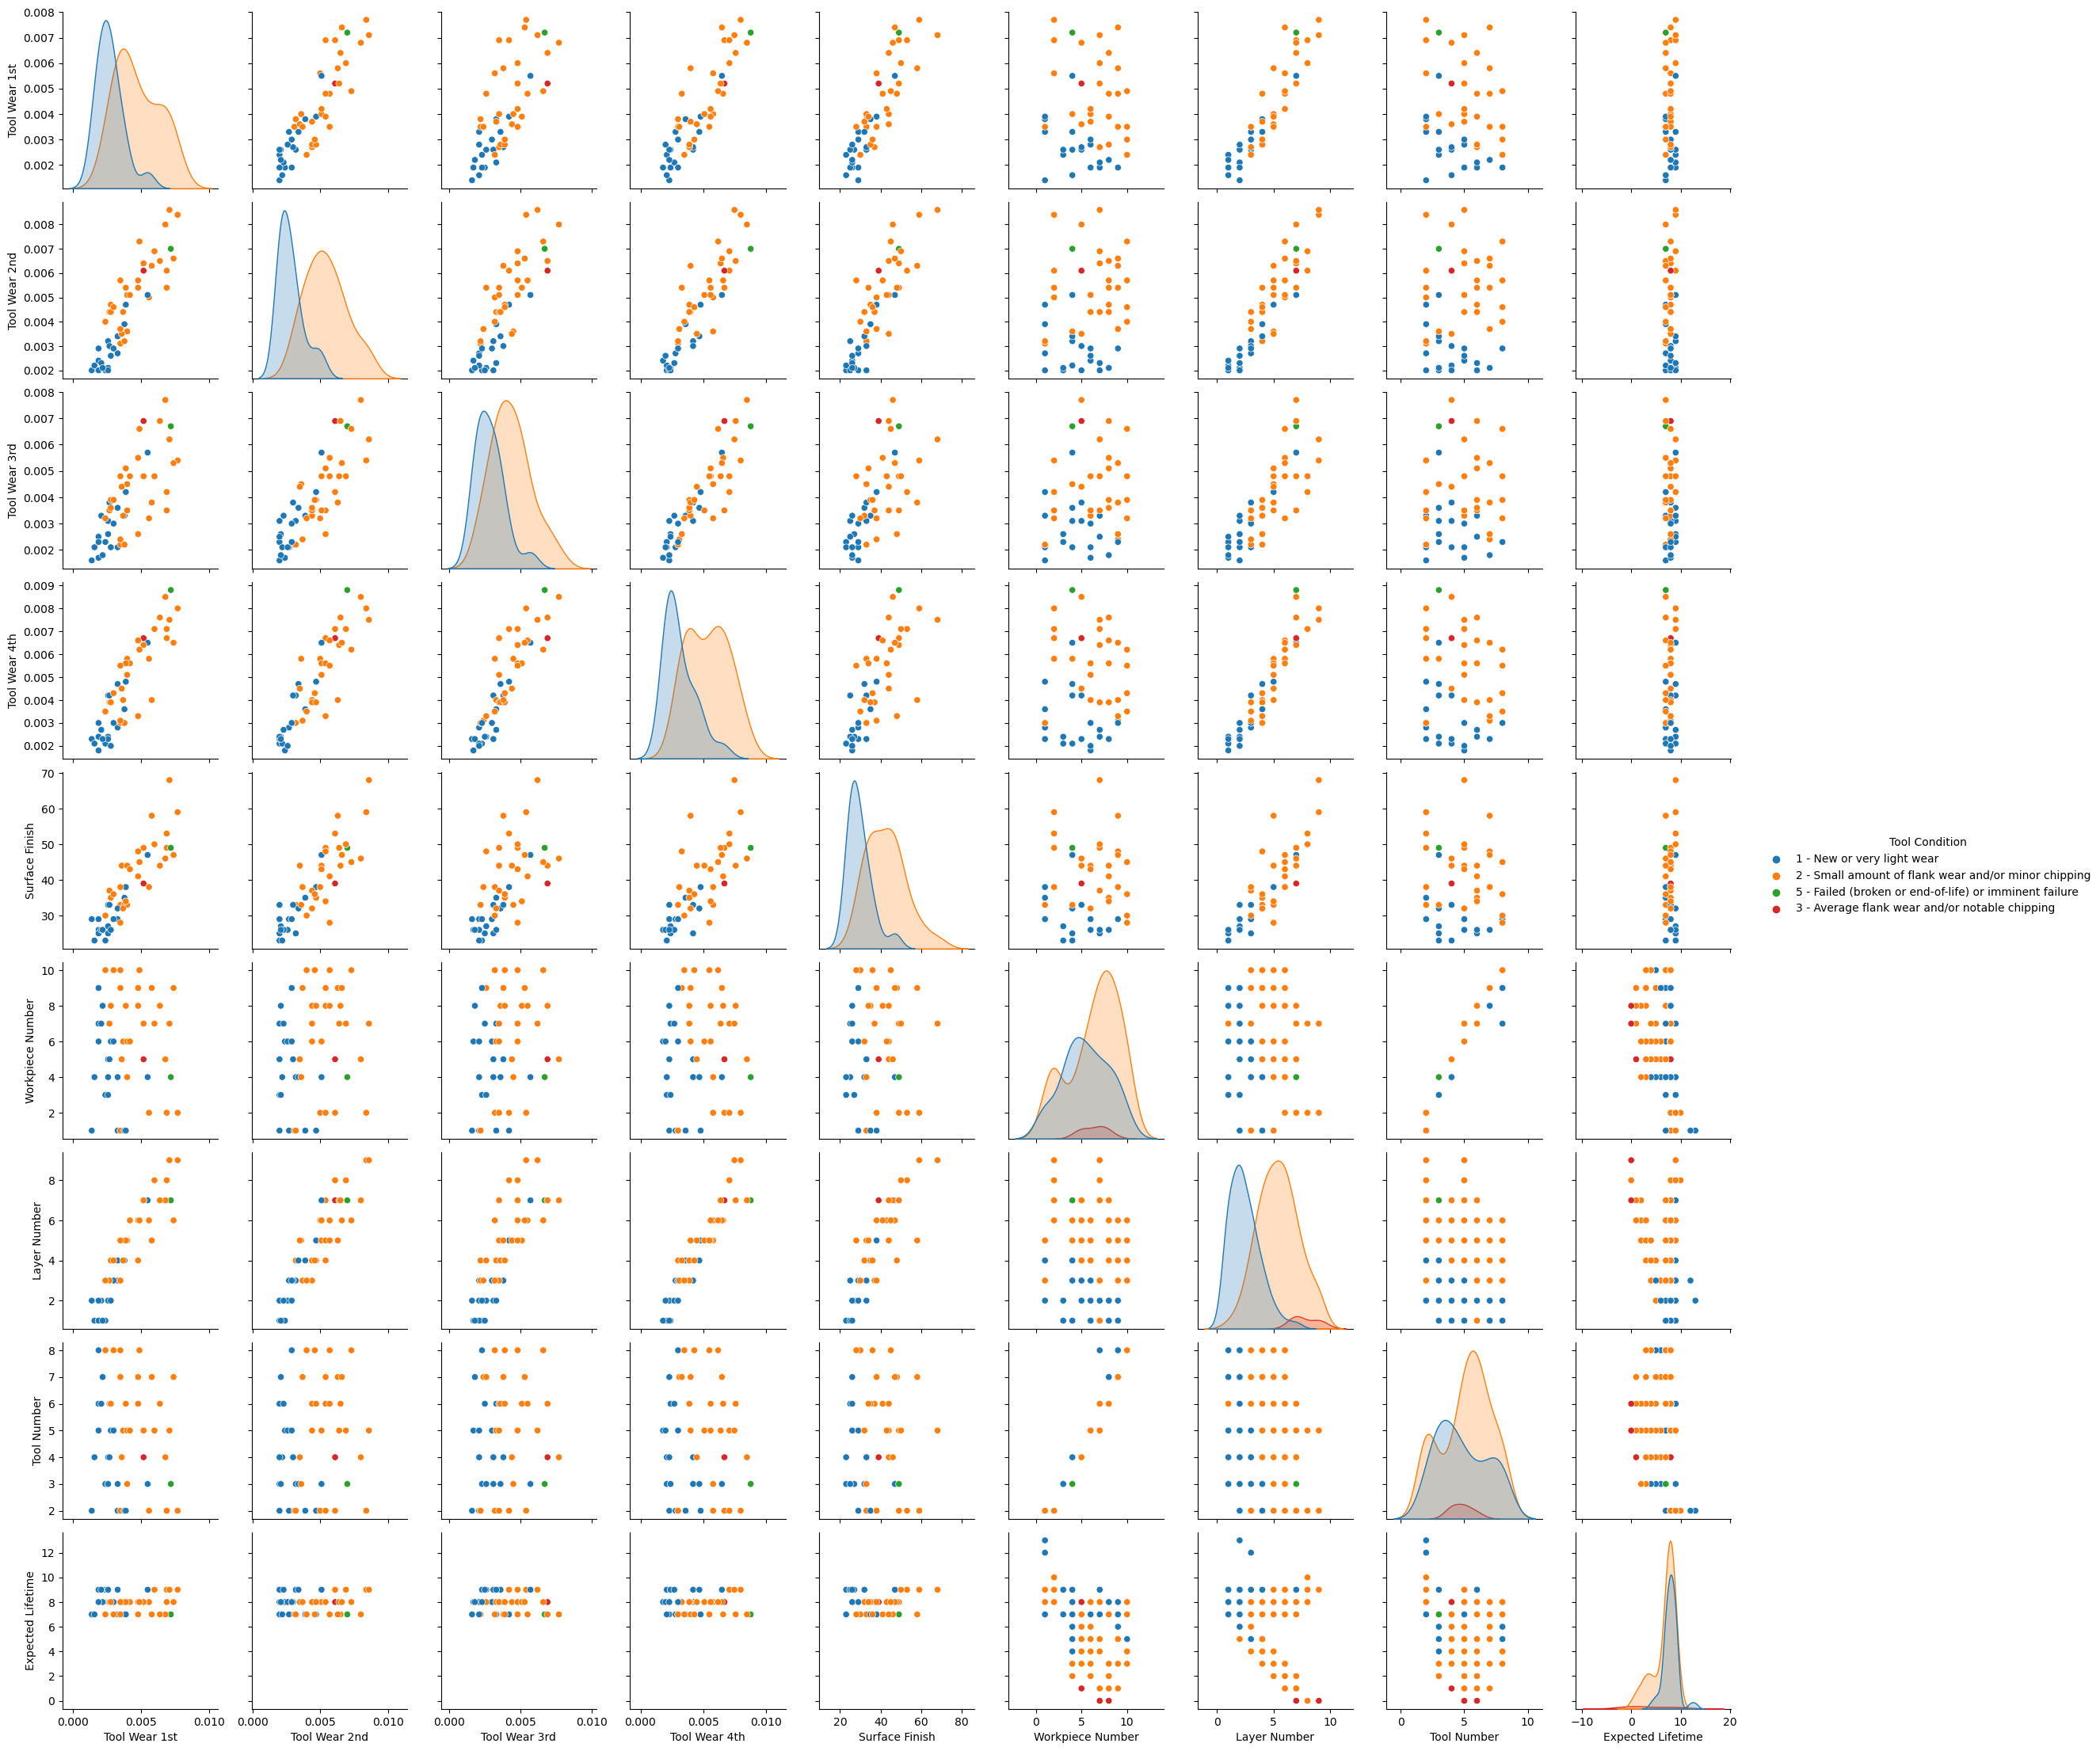

In [49]:
sns.pairplot(X, hue = 'Tool Condition')

In [50]:
X['Process Condition'].unique()

array(['1 - Working as normal', '2 - Minor unusual behavior', nan,
       '3 - Notable unusual occurrences',
       '4 - Significant unusual behavior'], dtype=object)

In [51]:
sns.pairplot(df, hue = 'Process Condition')

NameError: name 'df' is not defined

In [ ]:
sns.catplot(x='Layer Number',y='Expected Lifetime', data=df, hue='Recorder')

In [ ]:
import spacy
nlp = spacy.load('en_core_web_md')

In [52]:
pd.DataFrame(nlp(u'cut').vector

array([-7.1819e-01, -1.3996e-01,  4.5992e-01, -4.0439e-01, -1.9704e-01,
       -3.2808e-01,  2.3487e-01,  1.1207e-01, -3.2267e-01,  1.0185e+00,
       -1.9709e-01,  3.3112e-01,  2.0629e-01,  1.0954e-01, -2.2377e-01,
       -2.2095e-01, -2.5498e-01,  1.3006e+00,  3.2432e-01,  1.3946e-01,
        6.2872e-01, -1.0332e-01, -2.7344e-01, -4.9074e-01, -1.4730e-01,
        1.8313e-01,  4.4448e-02,  5.3070e-01, -7.9100e-01, -6.7314e-01,
       -1.3738e-01,  5.9392e-01, -4.9489e-01, -7.6832e-02,  4.0364e-01,
       -3.0291e-01,  5.8445e-01,  4.7166e-01, -2.7029e-02,  7.7826e-02,
        1.8101e-01,  5.3650e-01,  2.2858e-01, -7.9523e-01,  4.7625e-01,
        2.9587e-01, -4.2512e-01, -7.7947e-01,  5.3994e-02,  2.6986e-01,
        3.1723e-01,  1.6122e-01, -7.2448e-02, -1.2689e-01, -7.0452e-01,
       -2.9205e-01,  1.4784e-01, -7.3990e-02,  5.3683e-02, -1.2098e-01,
       -3.9167e-01,  1.7926e-01,  2.9153e-01, -3.1136e-01,  1.1842e-01,
       -6.1123e-01,  1.2884e-01,  1.9264e-01,  8.0902e-02, -3.64

In [70]:
tokens = nlp('smooth with an elevated noise as compared to the start of the test')
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

smooth smooth 1.0
smooth with 0.14731472730636597
smooth an 0.2930326461791992
smooth elevated 0.0835815817117691
smooth noise 0.17922119796276093
smooth as 0.2930326461791992
smooth compared 0.09968741983175278
smooth to 0.014697975479066372
smooth the 0.14395621418952942
smooth start 0.1590210497379303
smooth of 0.23908933997154236
smooth the 0.14395621418952942
smooth test 0.015200593508780003
with smooth 0.14731472730636597
with with 1.0
with an 0.4210354685783386
with elevated 0.3020564019680023
with noise 0.13275328278541565
with as 0.4210354685783386
with compared 0.4472454786300659
with to 0.26337531208992004
with the 0.3112647235393524
with start 0.33232009410858154
with of 0.36641696095466614
with the 0.3112647235393524
with test 0.16494408249855042
an smooth 0.2930326461791992
an with 0.4210354685783386
an an 1.0
an elevated 0.4001406729221344
an noise 0.24588610231876373
an as 1.0
an compared 0.4070541262626648
an to 0.2954546809196472
an the 0.34982943534851074
an start 0.